In [33]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import shutil
from sklearn.model_selection import train_test_split


### Primero clasificar las imágenes

In [ ]:
# aqui estan las imgs 
image_dir = "/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/SEXTO/MODELOS2/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor/Brain Tumor"

# aqui se van a guardar 
output_base = "/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/SEXTO/MODELOS2/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor/data"
categories = {1: "tumor", 0: "no_tumor"}

# crear las carpetas 
for subset in ['train', 'test']:
    for label in categories.values():
        os.makedirs(os.path.join(output_base, subset, label), exist_ok=True)

# leer el csv que clasifica las imagenes en 1 tumor y 0 no tumor
df = pd.read_csv("/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/SEXTO/MODELOS2/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor/Brain Tumor/Brain Tumor.csv")

# añadir extensión si falta
df['Image'] = df['Image'].apply(lambda x: f"{x}.jpg" if not x.lower().endswith('.jpg') else x)

# dividir en train y test
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Class'], random_state=42)

# para que se muevan las imagenes 
def copiar_imagenes(dataframe, subset):
    for _, row in dataframe.iterrows():
        clase = categories[row['Class']] # 0 o 1
        img_name = row['Image'] # lee la imagen
        origen = os.path.join(image_dir, img_name) # carpeta original
        destino = os.path.join(output_base, subset, clase, img_name) # carpeta a donde va 
        if os.path.exists(origen):
            shutil.copyfile(origen, destino)
        else:
            print(f"Imagen no encontrada: {origen}")

# Copiar archivos
copiar_imagenes(train_df, 'train')
copiar_imagenes(test_df, 'test')


### Ahora si la CNN


- Intenté con 4 capas y salió bastante bien 
- 30% de las neuronas apagadas para que no realice overfitting 
- Usé las mismas funciones que en clase que son bastante eficientes y rápidas 

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7482 - loss: 0.5254 - val_accuracy: 0.8353 - val_loss: 0.3647
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.8529 - loss: 0.3431 - val_accuracy: 0.8858 - val_loss: 0.2982
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8846 - loss: 0.2671 - val_accuracy: 0.8884 - val_loss: 0.2757
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.9172 - loss: 0.1972 - val_accuracy: 0.9004 - val_loss: 0.2262
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 182s 2s/step - accuracy: 0.9373 - loss: 0.1719 - val_accuracy: 0.9124 - val_loss: 0.2478
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9538 - loss: 0.1257 - val_accuracy: 0.9177 - val_loss: 0.2242
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9561 - loss: 0.1143 - val_accuracy: 0.9124 - val_loss: 0.2999
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.9639 - loss: 0.0866 - val_accuracy: 0.9363 - v

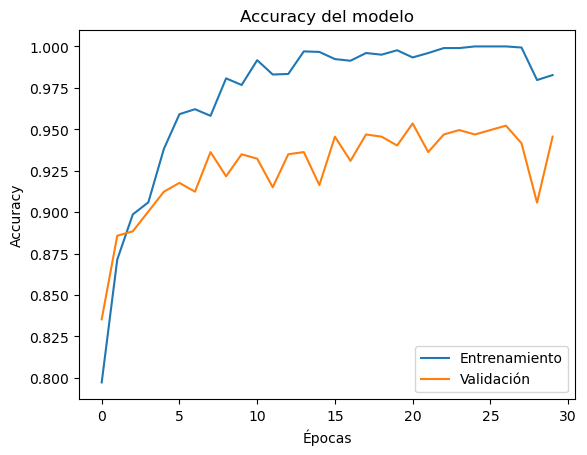

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)), # aqui solo lineas y contronos simples
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'), # aqui formas 
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.3),                # aqui ya ves como los tumores 
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_generator,
    epochs=30,                     
    validation_data=test_generator,
    
)

loss, accuracy = model.evaluate(test_generator)
print(f"Precisión en test: {accuracy:.2%}")

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy del modelo")
plt.show()

- Ahora agregaré una capa extra que podría ayudar a detectar formas extrañas del tumor (con esto tmb el número de filtros)
- Una capa adicional de dense --> para que junte todas las características de las capas anteriores y aprenda relaciones de las características 
- Reducir a 0.2 el dropout parece no haber overfitting, solo apaga el 20% de las neuronas 
- ### Salió peor 

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 158s 2s/step - accuracy: 0.7175 - loss: 0.5868 - val_accuracy: 0.7450 - val_loss: 0.5273
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8116 - loss: 0.4152 - val_accuracy: 0.7769 - val_loss: 0.4290
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.8543 - loss: 0.3225 - val_accuracy: 0.8831 - val_loss: 0.2774
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.8940 - loss: 0.2621 - val_accuracy: 0.9031 - val_loss: 0.2526
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9118 - loss: 0.2281 - val_accuracy: 0.9163 - val_loss: 0.2337
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9370 - loss: 0.1657 - val_accuracy: 0.9004 - val_loss: 0.2313
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 176s 2s/step - accuracy: 0.9475 - loss: 0.1373 - val_accuracy: 0.9084 - val_loss: 0.3127
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9515 - loss: 0.1325 - val_accuracy: 0.9376 - v

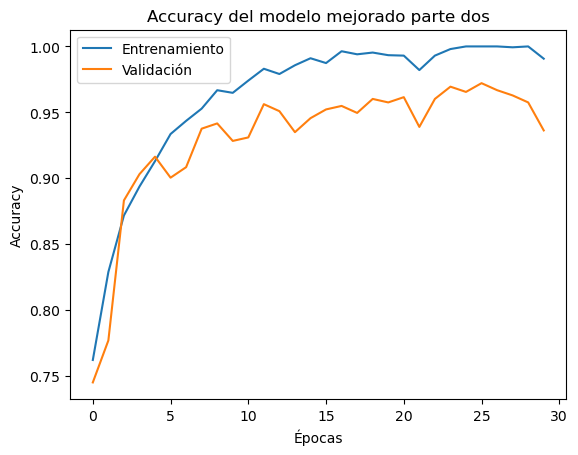

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),   # nueva capa
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.2),                              # menor dropout para conservar más señal
    Dense(256, activation='relu'),             # nueva capa densa más grande
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
)

loss, accuracy = model.evaluate(test_generator)
print(f"Precisión en test: {accuracy:.2%}")

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy del modelo mejorado parte dos")
plt.show()


- Subí el dropout de nuevo para que apagara la mitad de las neuronas 
- Mantuve la cuarta capa con más filtros 
- ### Tampoco funcionó 

Epoch 1/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7335 - loss: 0.5441 - val_accuracy: 0.8154 - val_loss: 0.4859
Epoch 2/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.8417 - loss: 0.3706 - val_accuracy: 0.8645 - val_loss: 0.3015
Epoch 3/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8803 - loss: 0.2744 - val_accuracy: 0.8818 - val_loss: 0.2825
Epoch 4/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.8932 - loss: 0.2643 - val_accuracy: 0.8871 - val_loss: 0.2965
Epoch 5/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9004 - loss: 0.2512 - val_accuracy: 0.9057 - val_loss: 0.2462
Epoch 6/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9326 - loss: 0.1817 - val_accuracy: 0.9031 - val_loss: 0.2195
Epoch 7/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.9017 - loss: 0.2230 - val_accuracy: 0.9190 - val_loss: 0.2092
Epoch 8/30
95/95 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9481 - loss: 0.1300 - val_accuracy: 0.9110 - v

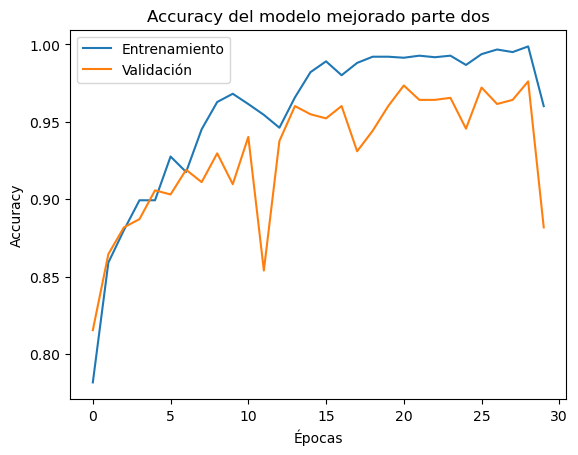

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(256, (3, 3), activation='relu'),   # nueva capa
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),                              # menor dropout para conservar más señal
    Dense(256, activation='relu'),             # nueva capa densa más grande
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
)

loss, accuracy = model.evaluate(test_generator)
print(f"Precisión en test: {accuracy:.2%}")

plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy del modelo mejorado parte dos")
plt.show()


- Finalmente decidí quitar una capa, mantener el número de neuronas apagadas y funcionó mejor 
- También un aspecto importante a considerar es que mi número de epochs lo subí a 50, como lo habíamos estado haciendo en clase y tardó cerca de hora y media en correr 
- ### Esta sería la CNN con mejor accuracy pero tarda bastante 

Found 3009 images belonging to 2 classes.
Found 753 images belonging to 2 classes.


/Users/sabrina/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Users/sabrina/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.7310 - loss: 0.5597 - val_accuracy: 0.8313 - val_loss: 0.3940
Epoch 2/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8343 - loss: 0.3775 - val_accuracy: 0.8327 - val_loss: 0.3687
Epoch 3/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.8730 - loss: 0.3263 - val_accuracy: 0.8738 - val_loss: 0.3242
Epoch 4/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.8719 - loss: 0.2952 - val_accuracy: 0.8752 - val_loss: 0.2775
Epoch 5/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.8870 - loss: 0.2716 - val_accuracy: 0.8592 - val_loss: 0.3898
Epoch 6/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.8961 - loss: 0.2796 - val_accuracy: 0.8884 - val_loss: 0.2546
Epoch 7/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9039 - loss: 0.2552 - val_accuracy: 0.8991 - val_loss: 0.2534
Epoch 8/50
95/95 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9132 - loss: 0.1967 - val_accuracy: 0.9044 - v

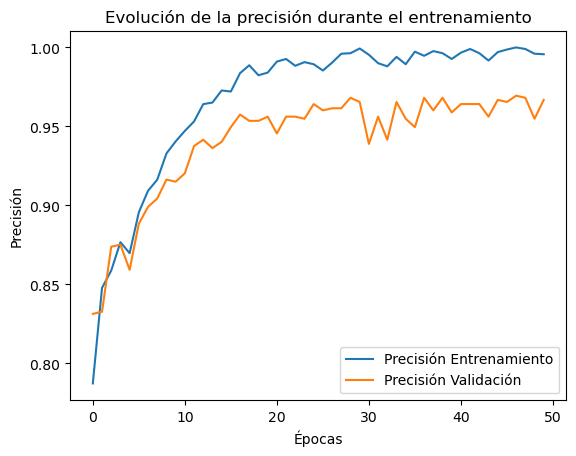

In [34]:

train_dir = "/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/SEXTO/MODELOS2/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor/data/train"
test_dir = "/Users/sabrina/Documents/UNI/A-NEUROCIENCIAS/SEXTO/MODELOS2/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor/data/test"

# se reescalan píxeles de 0–255 a 0–1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# cargar img desde carpetas
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),   # Redimensionar todas las imágenes a 150x150
    batch_size=32,
    class_mode='binary'       # Clasificación binaria: tumor vs no_tumor
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),                 
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # 1 salida con activación sigmoide (probabilidad)
])

model.compile(
    optimizer='adam',              # Optimizador eficiente
    loss='binary_crossentropy',    # Pérdida para clasificación binaria
    metrics=['accuracy']           # Métrica de desempeño
)

history = model.fit(
    train_generator,
    epochs=50,                     
    validation_data=test_generator
)

# evaluar modelo 
loss, accuracy = model.evaluate(test_generator)
print(f"Precisión en test: {accuracy:.2%}")



# ver entrenamiento 
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title("Evolución de la precisión durante el entrenamiento")
plt.show()


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

# no usamos imagen porque no sirve de nada y class en realidad es el valor que queremos que nos devuelva 
X = df.drop(columns=['Image', 'Class'])
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

modelos = {
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'SVM (RBF)': SVC(kernel='rbf'),
    'LDA': LinearDiscriminantAnalysis(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# entrenar y evaluar cada modelo
resultados = {}
for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nombre] = acc

resultados


{'KNN (k=5)': 0.7861885790172642,
 'SVM (RBF)': 0.796812749003984,
 'LDA': 0.9760956175298805,
 'Random Forest': 0.9933598937583001}

### Después comparé las características que obtuvimos de las imágenes (kurtosis, entropía, etc) con otros modelos supervisados que no son para imágenes y tuvieron un accuracy aún más alto (LDA y Random Forest)

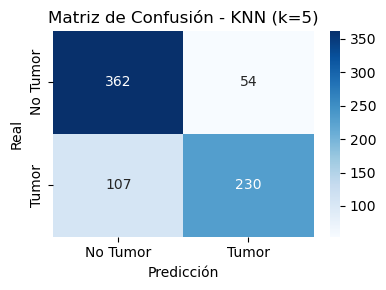

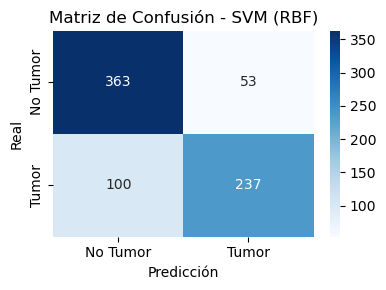

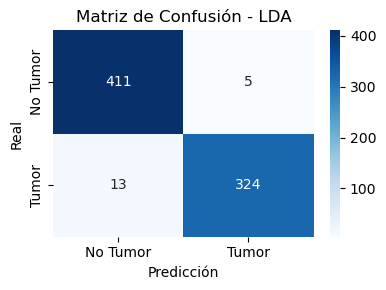

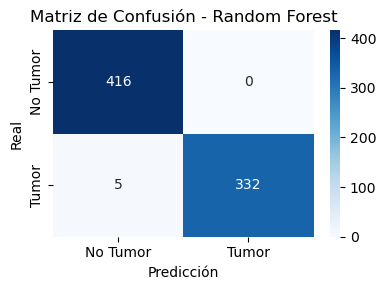

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# matrices de confusión
for nombre, modelo in modelos.items():
    y_pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Tumor', 'Tumor'],
                yticklabels=['No Tumor', 'Tumor'])
    plt.title(f'Matriz de Confusión - {nombre}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.tight_layout()
    plt.show()
